In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/CV_ENG_8160/module 3'

/content/drive/MyDrive/CV_ENG_8160/module 3


In [ ]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path
from PIL import Image
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [ ]:
class traffic_sign(Dataset):
    def __init__(self, *args):

        # initialize dataset variables here
        print ('initialize')

    def __len__(self):
        # returns the length of the dataset
        return None

    def __getitem__(self, index):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        return image, label

In [ ]:
# traffic_sign_dataset=traffic_sign(root_dir)

In [ ]:
# root_dir="data/traffic_signs_class"
# obj=traffic_sign(root_dir)
# for dir in obj.root.iterdir():
#   print(dir)
#   # print(list(dir.glob('*')))

In [ ]:
# for idx,sample in enumerate(obj):
#   print(idx,sample)
#   if idx==5:
#     break


In [ ]:
class traffic_sign(Dataset):
    def __init__(self, root_dir ):

        # initialize dataset variables here
        # self.root = root_dir
        self.root = Path(root_dir)

        self.df = pd.DataFrame(columns = ['image_names','class_label'])

        for fldr in self.root.iterdir():
          img_names = []
          if fldr.is_dir():
            img_names = img_names + list(fldr.glob('*.ppm'))

          img_names = [i for i in img_names]
          df_cur = pd.DataFrame(img_names,columns = ['image_names'])
          df_cur['class_label'] = fldr.name
          self.df = pd.concat([self.df, df_cur],axis=0)

        self.df = self.df.sample(frac=1)
        self.image_names = list(self.df['image_names'].values)
        self.class_label = list(self.df['class_label'].values)


    def __len__(self):
        # returns the length of the dataset
        return len(self.image_names)

    def __getitem__(self, idx):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        image = self.image_names[idx]
        image_data = io.imread(image)
        # image_np = Image.fromarray(image_data)

        label = self.class_label[idx]

        sample = {'image': image_data, 'label': label}

        return sample

In [ ]:
traffic_sign_dataset = traffic_sign('data/traffic_signs_class')

0 (63, 63, 3) 00033
1 (58, 63, 3) 00031
2 (39, 43, 3) 00013
3 (50, 56, 3) 00031
4 (141, 132, 3) 00014
5 (63, 54, 3) 00013
6 (53, 50, 3) 00033
7 (42, 47, 3) 00013


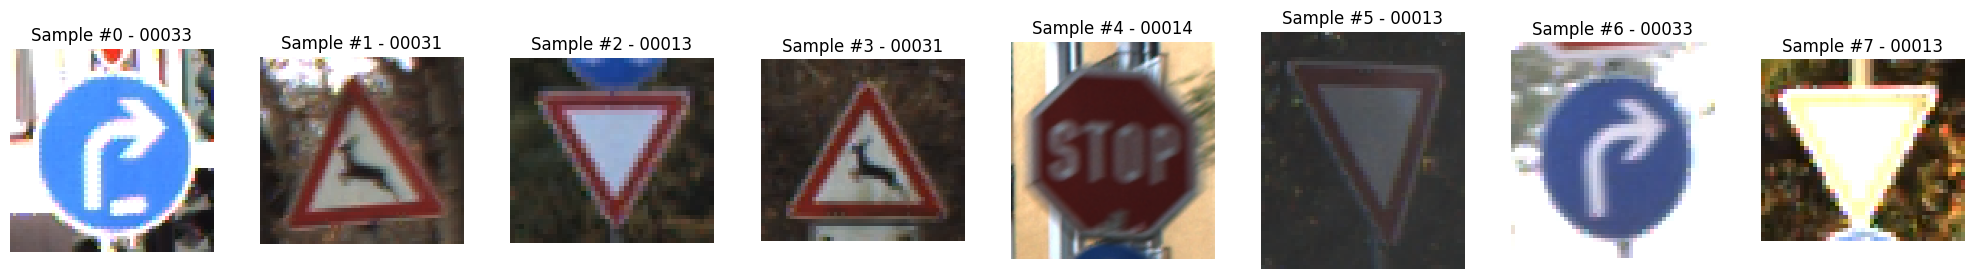

In [ ]:
fig = plt.figure(figsize=(20,20))
ncols = 8
for i, sample in enumerate(traffic_sign_dataset):
  print(i, sample['image'].shape, sample['label'])
  ax = plt.subplot(1, ncols, i + 1)
  plt.tight_layout()
  ax.set_title('Sample #{} - {}'.format(i, sample['label']))
  ax.axis('off')
  # show_landmarks(**sample)
  plt.imshow(sample['image'])

  if i == ncols-1:
      plt.show()
      break

In [ ]:
output_size=256

In [ ]:
## transform data
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple)) #assert checks if a certain condition is met
        self.output_size = output_size

    def __call__(self, sample):
        image, labels = sample['image'], sample['label']
        print(sample['image'])
        h, w = image.shape[:2]

        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'label': labels}

[[[240 237 235]
  [233 233 231]
  [240 242 242]
  ...
  [155 163 163]
  [208 215 214]
  [237 243 241]]

 [[235 235 232]
  [231 233 231]
  [241 245 244]
  ...
  [141 144 147]
  [191 194 194]
  [237 240 236]]

 [[230 234 231]
  [229 234 231]
  [235 242 240]
  ...
  [152 150 154]
  [195 195 197]
  [237 237 238]]

 ...

 [[182 180 179]
  [187 185 184]
  [197 195 194]
  ...
  [228 216 221]
  [185 171 171]
  [151 144 138]]

 [[167 166 167]
  [170 169 173]
  [173 173 175]
  ...
  [175 167 175]
  [163 154 153]
  [144 139 128]]

 [[195 194 203]
  [197 197 208]
  [195 196 203]
  ...
  [201 197 203]
  [166 161 161]
  [139 135 129]]]


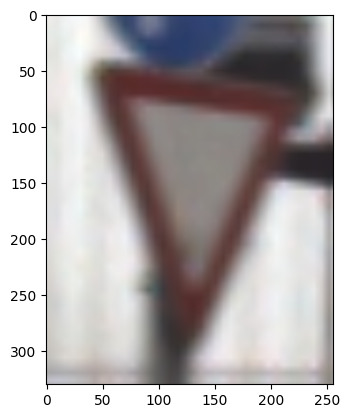

In [ ]:
scale=Rescale(256)
out_img = scale(traffic_sign_dataset[500])
plt.imshow(out_img['image'])

[[[240 237 235]
  [233 233 231]
  [240 242 242]
  ...
  [155 163 163]
  [208 215 214]
  [237 243 241]]

 [[235 235 232]
  [231 233 231]
  [241 245 244]
  ...
  [141 144 147]
  [191 194 194]
  [237 240 236]]

 [[230 234 231]
  [229 234 231]
  [235 242 240]
  ...
  [152 150 154]
  [195 195 197]
  [237 237 238]]

 ...

 [[182 180 179]
  [187 185 184]
  [197 195 194]
  ...
  [228 216 221]
  [185 171 171]
  [151 144 138]]

 [[167 166 167]
  [170 169 173]
  [173 173 175]
  ...
  [175 167 175]
  [163 154 153]
  [144 139 128]]

 [[195 194 203]
  [197 197 208]
  [195 196 203]
  ...
  [201 197 203]
  [166 161 161]
  [139 135 129]]]


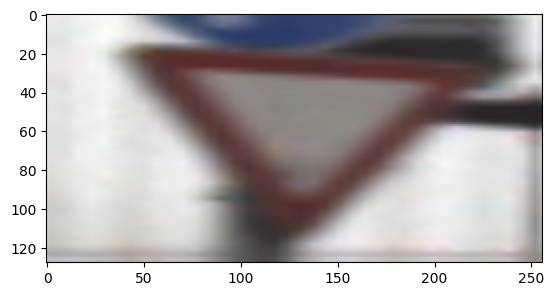

In [ ]:
scale=Rescale((128,256))
out_img = scale(traffic_sign_dataset[500])
plt.imshow(out_img['image'])

In [ ]:
# import time
# composed = transforms.Compose([Rescale(256), Flip(0)])
# for i,trnsfm in enumerate([Flip(1), Rescale(128),composed]):
#   print (type(trnsfm).__name__)
#   # print (trnsfm(traffic_sign_dataset[500]))

#   ax = plt.subplot(1, 3, i + 1)
#   plt.imshow(trnsfm(traffic_sign_dataset[500])['image'])
#   plt.tight_layout()
#   ax.set_title(type(trnsfm).__name__)

In [ ]:
## write a class to flip the image from left  to right

# np.flip(image,0) #horizontal flip
# np.flip(image,1) #v flip
# #


class flip(object):
    def __init__(self, flip_type):
      assert isinstance(flip_type, int) #assert checks if a certain condition is met
      self.flip_type = flip_type

    def __call__(self, sample):
        image, labels = sample['image'], sample['label']
        image = np.flip(image,self.flip_type)

        sample = {'img': image, 'label': labels}
        return sample




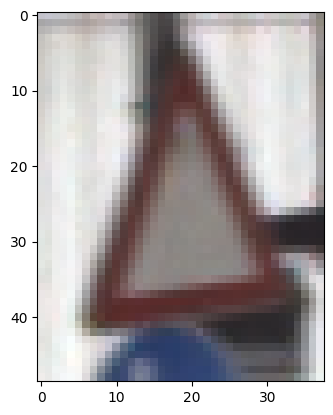

In [ ]:
obj = flip(flip_type=0)
out_img = obj(traffic_sign_dataset[500])
plt.imshow(out_img['img'])


In [ ]:
## write a class to convert image to tensor

class ToTensor(object):
  def __call__(self, sample):
      image, label = sample['image'], sample['label']
      image = torch.from_numpy(image)
      imageT = image.transpose(1,2).transpose(0,1) #change (H,W,C) to (C,W,H)
      print(image.shape)
      print(imageT.shape)
      sample = {'image': imageT, 'label': label}
      return sample['image']

In [ ]:
obj = ToTensor()
img_tensor = obj(traffic_sign_dataset[500])
img_tensor


torch.Size([49, 38, 3])
torch.Size([3, 49, 38])


tensor([[[240, 233, 240,  ..., 155, 208, 237],
         [235, 231, 241,  ..., 141, 191, 237],
         [230, 229, 235,  ..., 152, 195, 237],
         ...,
         [182, 187, 197,  ..., 228, 185, 151],
         [167, 170, 173,  ..., 175, 163, 144],
         [195, 197, 195,  ..., 201, 166, 139]],

        [[237, 233, 242,  ..., 163, 215, 243],
         [235, 233, 245,  ..., 144, 194, 240],
         [234, 234, 242,  ..., 150, 195, 237],
         ...,
         [180, 185, 195,  ..., 216, 171, 144],
         [166, 169, 173,  ..., 167, 154, 139],
         [194, 197, 196,  ..., 197, 161, 135]],

        [[235, 231, 242,  ..., 163, 214, 241],
         [232, 231, 244,  ..., 147, 194, 236],
         [231, 231, 240,  ..., 154, 197, 238],
         ...,
         [179, 184, 194,  ..., 221, 171, 138],
         [167, 173, 175,  ..., 175, 153, 128],
         [203, 208, 203,  ..., 203, 161, 129]]], dtype=torch.uint8)

In [ ]:
class TrafficSignDataset(Dataset):
    def __init__(self, root_dir, transform=None):

        # initialize dataset variables here
        # self.root = root_dir
        self.root = Path(root_dir)
        self.transform = transform

        self.df = pd.DataFrame(columns = ['image_names','class_label'])

        for fldr in self.root.iterdir():
          img_names = []
          if fldr.is_dir():
            img_names = img_names + list(fldr.glob('*.ppm'))

          img_names = [i for i in img_names]
          df_cur = pd.DataFrame(img_names,columns = ['image_names'])
          df_cur['class_label'] = fldr.name
          self.df = pd.concat([self.df, df_cur],axis=0)

        self.df = self.df.sample(frac=1)
        self.image_names = list(self.df['image_names'].values)
        self.class_label = list(self.df['class_label'].values)


    def __len__(self):
        # returns the length of the dataset
        return len(self.image_names)

    def __getitem__(self, idx):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        image = self.image_names[idx]
        image_data = io.imread(image)
        # image_np = Image.fromarray(image_data)

        label = self.class_label[idx]

        sample = {'image': image_data, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
compose_transforms = transforms.Compose([Rescale((256,256)), Flip(0)])
traffic_obj = TrafficSignDataset('data/traffic_signs_class',transform=compose_transforms)

In [ ]:
for i,ts in enumerate(traffic_obj):
  print (ts['image'].shape)
  if i == 5:
    break

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
